**End-to-end Machine Learning project**

Predict median house values in California, given a number of features. Each datapoint represents district level features.

## Working with Data

In [1]:
import pandas as pd
import requests

housing = pd.read_csv(r"..\datasets\housing\housing_with_districts.csv")

In [2]:
housing.head()
# housing.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,district
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Alameda County
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Alameda County
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Alameda County
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,Alameda County
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Alameda County


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20065 entries, 0 to 20064
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20065 non-null  float64
 1   latitude            20065 non-null  float64
 2   housing_median_age  20065 non-null  float64
 3   total_rooms         20065 non-null  float64
 4   total_bedrooms      19865 non-null  float64
 5   population          20065 non-null  float64
 6   households          20065 non-null  float64
 7   median_income       20065 non-null  float64
 8   median_house_value  20065 non-null  float64
 9   ocean_proximity     20065 non-null  object 
 10  district            20065 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.7+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2572
NEAR BAY      1801
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20065.000000,20065.000000,20065.000000,20065.000000,19865.000000,20065.000000,20065.000000,20065.000000,20065.000000
mean,-119.487391,35.570922,28.109046,2645.184401,537.771860,1431.315624,499.361874,3.868552,203075.881884
std,1.971276,2.135348,12.270699,2204.347537,424.219252,1143.214226,384.956034,1.905900,113450.854678
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.570000,33.930000,18.000000,1443.000000,295.000000,785.000000,278.000000,2.553600,118100.000000
50%,-118.450000,34.220000,28.000000,2126.000000,433.000000,1167.000000,408.000000,3.525000,176000.000000
75%,-117.990000,37.650000,36.000000,3159.000000,646.000000,1736.000000,604.000000,4.761200,258300.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Create the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [6]:
# to save the figures as high-res PNGs
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

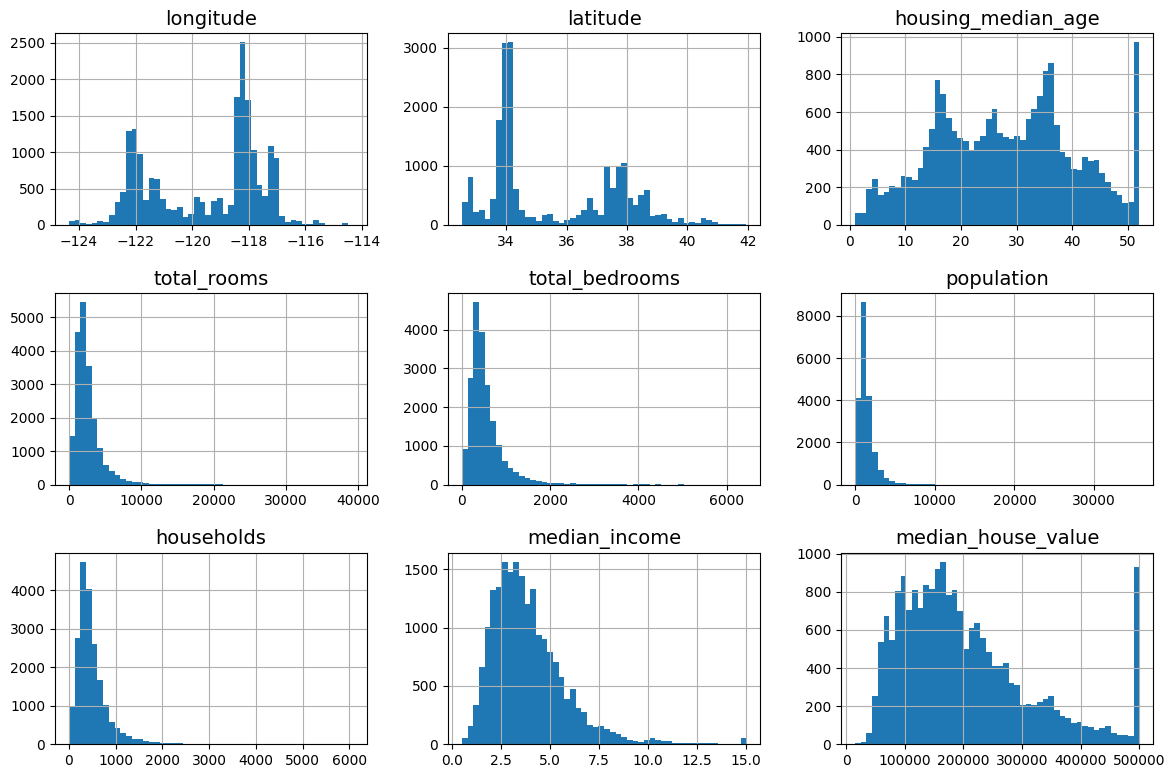

In [7]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig(r"attribute_histogram_plots")  # extra code
plt.show()

# Create a test set from scratch

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16052

In [10]:
len(test_set)

4013

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [11]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [12]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index()  # adds an `index` column
print(housing_with_id)
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

       index  longitude  latitude  housing_median_age  total_rooms  \
0          0    -122.23     37.88                41.0        880.0   
1          1    -122.22     37.86                21.0       7099.0   
2          2    -122.24     37.85                52.0       1467.0   
3          3    -122.25     37.85                52.0       1274.0   
4          4    -122.25     37.85                52.0       1627.0   
...      ...        ...       ...                 ...          ...   
20060  20060    -121.09     39.48                25.0       1665.0   
20061  20061    -121.21     39.49                18.0        697.0   
20062  20062    -121.22     39.43                17.0       2254.0   
20063  20063    -121.32     39.43                18.0       1860.0   
20064  20064    -121.24     39.37                16.0       2785.0   

       total_bedrooms  population  households  median_income  \
0               129.0       322.0       126.0         8.3252   
1              1106.0      2401

In [14]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

# Create a stratified test set using sklearn

#### Example explanation of Bad Sample chances (not related to input data)
 To understand the importance of representative split of data. Random split would not be as representative as stratified split.

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).  The cumulative distribution function (CDF) in a binomial distribution gives the probability of getting at most k successes in n independent trials.



The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [15]:
# shows how to compute the 10.7% proba of getting a bad sample


from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511 
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


If you prefer simulations over maths, here's how you could get roughly the same result:

In [16]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

## importance of median_income

Getting info from experts that median_income is very imp attribute to predict median housing prices.  So, we ensure that test set is representative of various categories of incomes in the whole dataset.

Most median income is clustered around 1.5 to 6, but some median income goes far beyond 6. it is in the multiple of 10k, so if 2 is the median income than it is 2*10000= 20000 dollars.

So lets create 5 income categories:

    category1: 0 to 1.5

    category2: 1.5 to 3

    category3: 3 to 4.5

    category4: 4.5 to 6

    category5: 6 to infinity

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
print(housing["income_cat"])

0        5
1        5
2        5
3        4
4        3
        ..
20060    2
20061    2
20062    2
20063    2
20064    2
Name: income_cat, Length: 20065, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


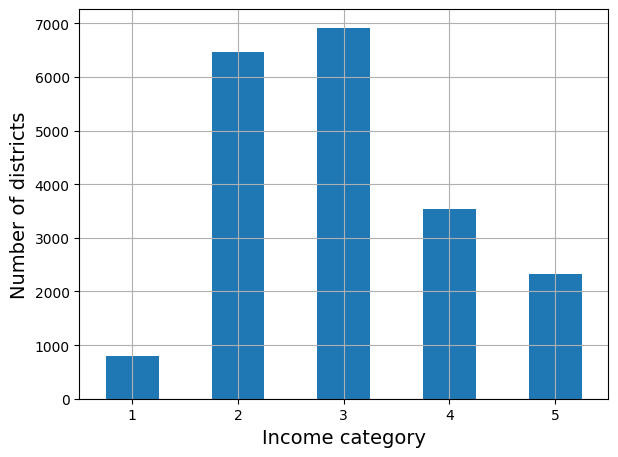

In [18]:
# bar graph of income category

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [19]:
# To get multiple stratified splits of train-test data

# from sklearn.model_selection import StratifiedShuffleSplit

# splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# strat_splits = []
# for train_index, test_index in splitter.split(housing, housing["income_cat"]):
#     strat_train_set_n = housing.iloc[train_index]
#     strat_test_set_n = housing.iloc[test_index]
#     strat_splits.append([strat_train_set_n, strat_test_set_n])

# print(strat_splits[0])
# strat_train_set, strat_test_set = strat_splits[0]

To get a single stratified split:

In [20]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [21]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.345128
2    0.322452
4    0.176676
5    0.115873
1    0.039870
Name: count, dtype: float64

In [22]:
# Comparison of income category proportion of test data for random sampling and stratified sampling. 
# Stratified sampling test data is almost indentical to full dataset, whereas, for randoming sample test data is skewed.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing), # full dataset
    "Stratified %": income_cat_proportions(strat_test_set), # stratified test data
    "Random %": income_cat_proportions(test_set), # random sampling test data
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.99,3.99,3.81,0.00,-4.38
2,32.26,32.25,32.07,-0.03,-0.57
3,34.50,34.51,35.93,0.04,4.16
4,17.67,17.67,16.94,-0.03,-4.12
5,11.59,11.59,11.24,0.00,-3.01


In [23]:
# we won't use income category column again, so dropping it
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [24]:
# lets experiment with various transformation of full training data, so creating a copy of the original so that one can revert to it afterwards.
housing = strat_train_set.copy()

#### Visualizing Geographical Data

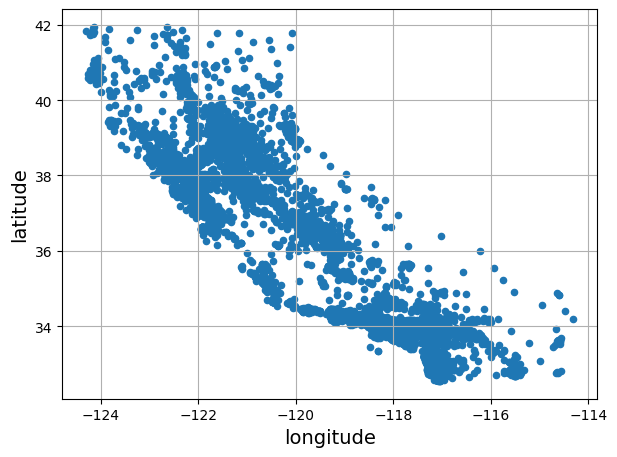

In [25]:
# create a scatterplot of all the districts to visualize the data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

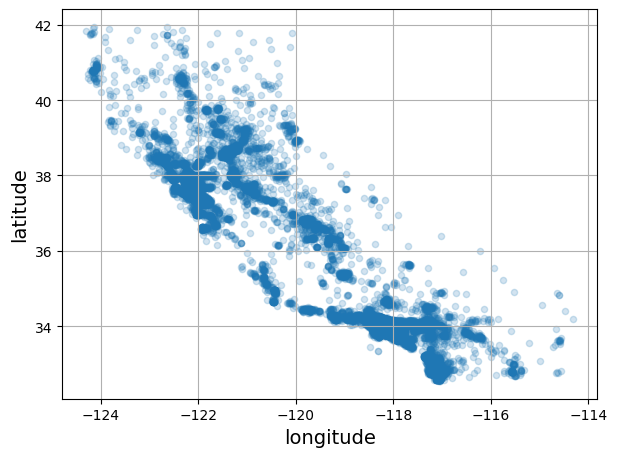

In [26]:
# setting alpha to 0.2 which makes it easier to visualize the places where there is a high-density of data points.
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

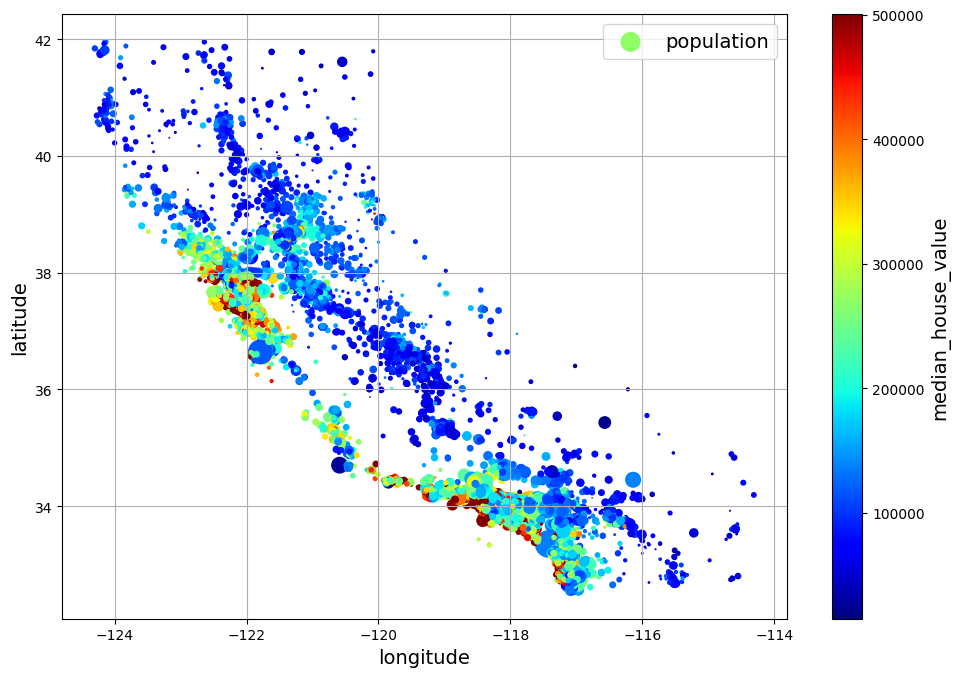

In [27]:
#Better visualization:
# Radius of each circle (s): district's population
# Color (c): median price of the house. using predefined colormap called 'jet'. Blue:low values to Red high values:


housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

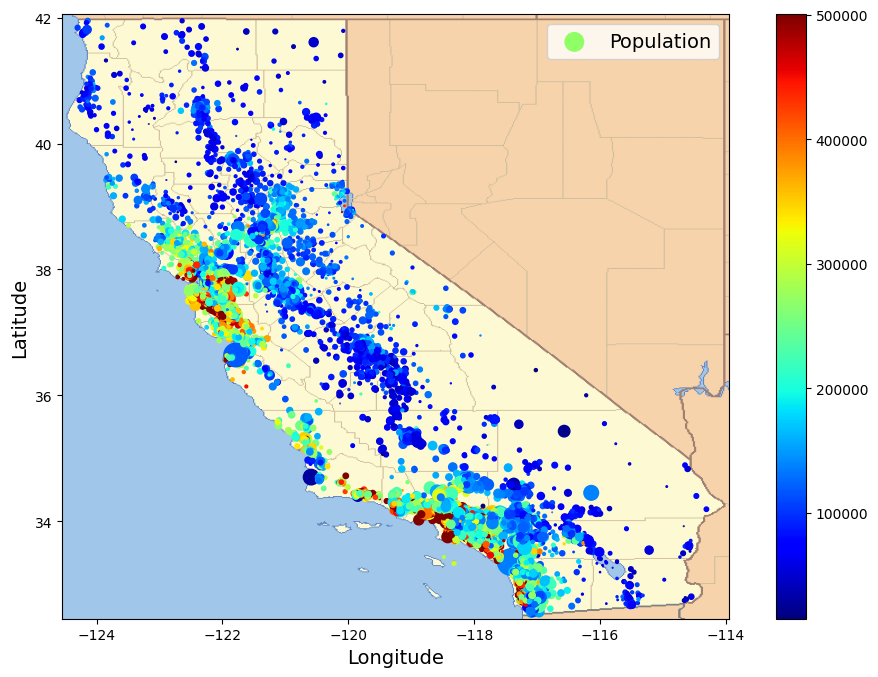

In [28]:
# with California image
# This image tells us that house price are very much related to the location and to the population density.
# Bay area has higher price of the house, so ocean_proximity column may be useful.

filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

housing_renamed.plot.scatter(
    x="Longitude", y="Latitude",
    s=housing_renamed["Population"] / 100, label="Population",
    c=housing_renamed["Median house value (ᴜsᴅ)"], cmap="jet", colorbar=True,
    figsize=(10, 7), sharex=False)

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

# Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [29]:
# standard correlation coefficient (Pearson's r) for every pair of attribute. As data size is not big.
corr_matrix = housing.corr(numeric_only=True)
# print(corr_matrix)

# correlation coefficient (Pearson's r) for median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.706875
total_rooms           0.139128
households            0.061775
housing_median_age    0.061525
total_bedrooms        0.044880
longitude            -0.004785
population           -0.019380
latitude             -0.180168
Name: median_house_value, dtype: float64

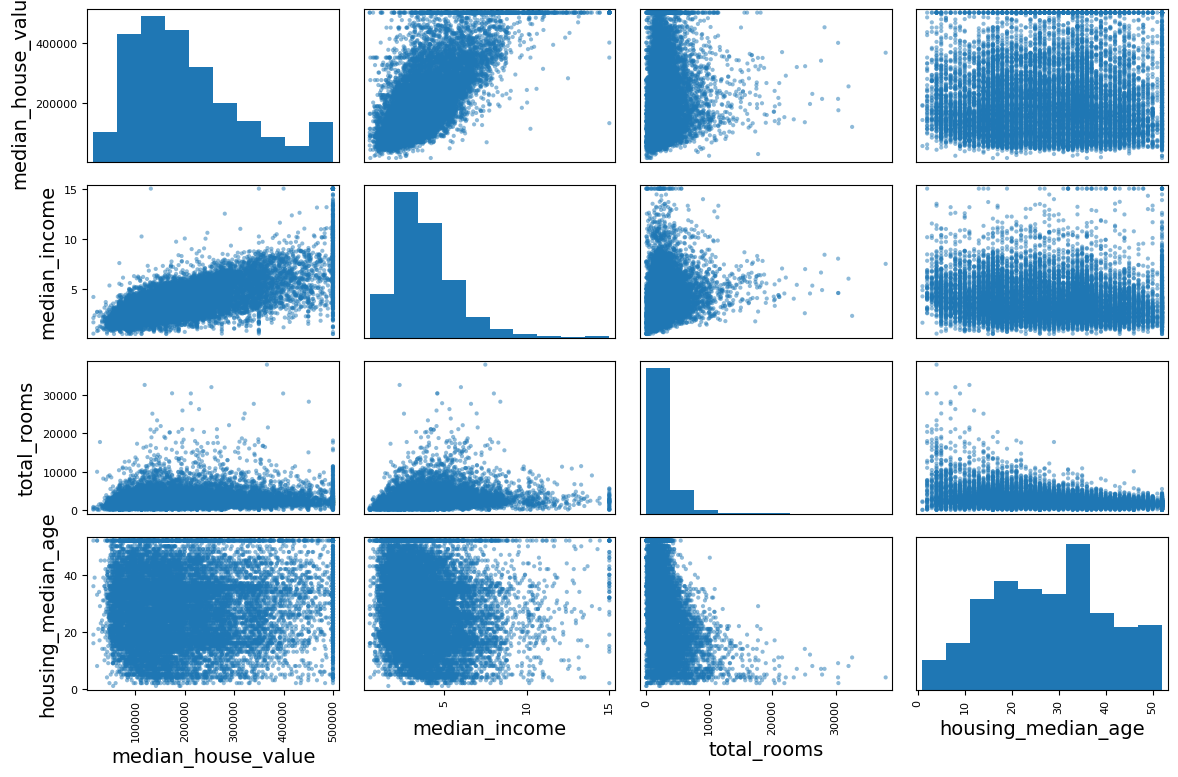

In [30]:
# lets visualize few important attributes out of it using scatter_matrix() function which is another way to check for correlation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

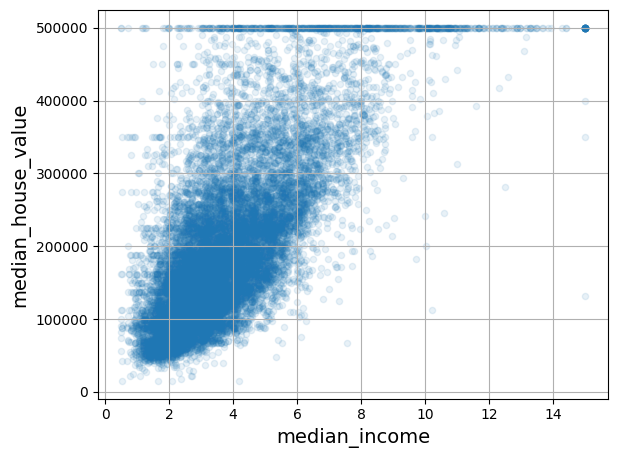

In [31]:
# Looking at the correlation scatterplots, it seems that the most promising attribute to predict the mdeian house is the median income.
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

#### Experimenting with Attribute Combinations

In [32]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [33]:
# look for correlation again
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

# seems like bedroom_ratio has inverse relationship with median_house_value. rooms_per_house also shows correlation. 

median_house_value    1.000000
median_income         0.706875
rooms_per_house       0.175011
total_rooms           0.139128
households            0.061775
housing_median_age    0.061525
total_bedrooms        0.044880
longitude            -0.004785
population           -0.019380
people_per_house     -0.031067
latitude             -0.180168
bedrooms_ratio       -0.281218
Name: median_house_value, dtype: float64

# Prepare the train/test data for ML Algorithms

Let's separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

#### inital checks

 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [35]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,district
3600,-117.20,32.79,29.0,1213.0,NaN,654.0,246.0,4.5987,NEAR OCEAN,San Diego County
9309,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,<1H OCEAN,Orange County
15485,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY,Solano County
3027,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,NEAR OCEAN,San Diego County
14485,-116.95,32.84,31.0,1307.0,NaN,752.0,231.0,3.4286,<1H OCEAN,San Diego County


In [36]:
# housing_option1 = housing.copy()

# housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

# housing_option1.loc[null_rows_idx].head()

In [37]:
# housing_option2 = housing.copy()

# housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

# housing_option2.loc[null_rows_idx].head()

In [38]:
# # Go with option 3
# housing_option3 = housing.copy()

# median = housing["total_bedrooms"].median()
# housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

# housing_option3.loc[null_rows_idx].head()

#### using median

In [39]:
# option 3 applicable to all the null columns if present during new data is ingested using simpleimputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [40]:
housing_num = housing.select_dtypes(include=[np.number])
# print(housing_num.loc[null_rows_idx])

In [41]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [42]:
# median obtained through imputer method
imputer.statistics_

array([-118.45,   34.22,   28.  , 2122.  ,  431.  , 1168.  ,  407.  ,
          3.52])

Check that this is the same as manually computing the median of each attribute:

In [43]:
# median gererated through median() method
housing_num.median().values

array([-118.45,   34.22,   28.  , 2122.  ,  431.  , 1168.  ,  407.  ,
          3.52])

Transform the training set:

In [44]:
X = imputer.transform(housing_num)
# print(X)

# all scikit learn transformer objects (eg: transform()) outputs Numpy array or sometimes Scipy sparse matrix even if pandas dataframe is fed in.
# So, we need to wrap the output again into pandas dataframe

# for scikit-learn >= 1.2, we can use set_config to get pandas df as output for input df. Currently not using it.
# from sklearn import set_config
# set_config(transform_output="pandas") 

In [45]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [46]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [47]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3600,-117.20,32.79,29.0,1213.0,431.0,654.0,246.0,4.5987
9309,-117.92,33.87,33.0,1597.0,431.0,1888.0,423.0,3.0550
15485,-122.22,38.08,37.0,2811.0,431.0,1574.0,516.0,3.1053
3027,-117.14,32.71,52.0,500.0,431.0,480.0,108.0,1.8696
14485,-116.95,32.84,31.0,1307.0,431.0,752.0,231.0,3.4286


In [48]:
imputer.strategy

'median'

In [49]:
#trials to drop some outliers:
# from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(random_state=42)
# outlier_pred = isolation_forest.fit_predict(X)
# outlier_pred

In [50]:
# drop the outliers:
# housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text/Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [51]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
877,NEAR OCEAN
17926,<1H OCEAN
16622,NEAR BAY
3600,NEAR OCEAN
2367,<1H OCEAN
8852,<1H OCEAN
16568,NEAR OCEAN
12505,NEAR BAY


#### ordinal encoder (for trial purpose)

In [52]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [53]:
housing_cat_encoded[:8]

array([[4.],
       [0.],
       [3.],
       [4.],
       [0.],
       [0.],
       [4.],
       [3.]])

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Issue with ordinal encoding is that it will assume two nearby values to be more similar than two distant values. This would work for categories like: bad, average, good, excellent. But it will not work for ocean_proximity. In this scenerio, <1H OCEAN is given value of 0 and NEAR OCEAN is given value of 4 (which should be ~1) where as INLAND is given value of 1 which should be ~4

one hot encoding is useful in this case

#### one hot encoder

By default, the `OneHotEncoder` class returns a sparse array, but by using `sparse_output` as False, we can get dense array

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16052, 5))

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [58]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [59]:
df_output = pd.DataFrame(cat_encoder.fit_transform(housing_cat), 
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cat)
df_output.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
"(NEAR OCEAN,)",0.0,0.0,0.0,0.0,1.0
"(<1H OCEAN,)",1.0,0.0,0.0,0.0,0.0
"(NEAR BAY,)",0.0,0.0,0.0,1.0,0.0
"(NEAR OCEAN,)",0.0,0.0,0.0,0.0,1.0
"(<1H OCEAN,)",1.0,0.0,0.0,0.0,0.0


## Feature Scaling

### initial trials

##### explore min max scaler and standard scaler

In [60]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[ 0.41541542, -0.95961743,  0.68627451, ..., -0.97163598,
        -0.91644737, -0.69277665],
       [ 0.16516517, -0.68119022,  0.37254902, ..., -0.94528995,
        -0.83618421, -0.56320602],
       [-0.54754755,  0.15409139, -0.01960784, ..., -0.93435915,
        -0.81217105, -0.65708059],
       ...,
       [-0.62162162,  0.08820404,  0.29411765, ..., -0.94938199,
        -0.90394737, -0.65444615],
       [-0.41341341,  0.30074389, -0.37254902, ..., -0.86726085,
        -0.66184211, -0.73000372],
       [ 0.51351351, -0.77045696, -0.60784314, ..., -0.9619384 ,
        -0.92105263, -0.66701149]], shape=(16052, 8))

In [61]:
# standard scaler will be less affected by outliers, as it uses mean and std. deviation instead of min value and max value 

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[ 1.14744936e+00, -1.33271221e+00,  1.28863558e+00, ...,
        -7.97296079e-01, -6.31709573e-01, -5.97789007e-01],
       [ 5.12869884e-01, -7.19181775e-01,  6.39917766e-01, ...,
        -3.92217824e-01,  2.60585425e-04, -1.06421558e-01],
       [-1.29441246e+00,  1.12140955e+00, -1.70979496e-01, ...,
        -2.24153442e-01,  1.89333625e-01, -4.62419733e-01],
       ...,
       [-1.48224799e+00,  9.76222953e-01,  4.77738314e-01, ...,
        -4.55134234e-01, -5.33287991e-01, -4.52429188e-01],
       [-9.54277865e-01,  1.44456680e+00, -9.00787033e-01, ...,
         8.07503306e-01,  1.37298265e+00, -7.38964305e-01],
       [ 1.39620452e+00, -9.15886191e-01, -1.38732539e+00, ...,
        -6.48192807e-01, -6.67970156e-01, -5.00080428e-01]],
      shape=(16052, 8))

In [62]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [63]:
predictions

array([[155100.77888136],
       [194455.89524426],
       [165942.91653808],
       [233500.99685191],
       [147245.6752854 ]])

In [64]:
# we can directly use StandardScaler using TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [65]:
predictions

array([155100.77888136, 194455.89524426, 165942.91653808, 233500.99685191,
       147245.6752854 ])

##### analysing population data

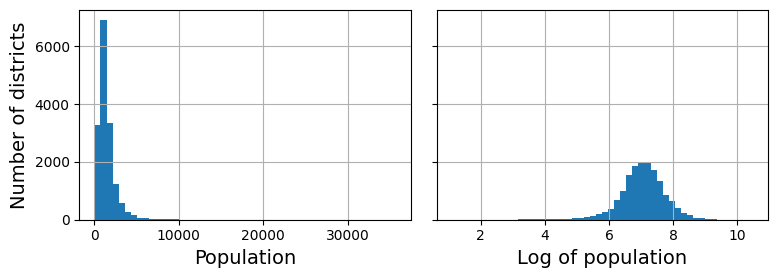

In [66]:
# population data follows power law distribution (long tail on the right- first figure)
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()





Why use np.log:
1) Reduce Skewness:

    -   The original population data is highly skewed (not symmetric).

    -   Log transformation compresses large values and spreads out smaller ones, making the distribution closer to normal.

2) Improve Visibility:

    - On a histogram, a long tail makes it hard to see the variation among the majority of lower-population districts.

    - Log-scaling brings those hidden details into view by flattening the tail.

3) Better for Modeling:

    - Many machine learning models (like linear regression) assume features are normally distributed.

    - Log-transforming helps meet that assumption and can improve model performance and interpretability.

4) Stabilize Variance:

    - Log transformation reduces heteroscedasticity (variance depending on the mean), which can also benefit modeling.


## Custom Transformers

In [67]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.utils.validation import check_array, check_is_fitted

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        X = check_array(X)  # checks that X is an array with finite float values
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _). To be definately provided as validation for production code
        X = check_array(X)
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
#RBF Kernel
# - Similarity between two points (based on distance).
# - Ranges between 0 and 1, with 1 meaning identical points.
# - The similarity decays exponentially with distance.
# - The kernel smooths distances through gamma (𝛾)

#Why rbf kernal instead of euclidean distance of kmeans?
#  To preserve more information: how close a point is to all clusters, not just one.

# Analogy
# KMeans (Euclidean distance): "You belong to Cluster 3."
# ClusterSimilarity (): "You are 80% similar to Cluster 3, 60% to Cluster 5, etc." 

**Warning**:
* There was a change in Scikit-Learn 1.3.0 which affected the random number generator for `KMeans` initialization. Therefore the results will be different than in the book if you use Scikit-Learn ≥ 1.3. That's not a problem as long as you don't expect the outputs to be perfectly identical.
* Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

In [68]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [69]:
# outputs similarity ratio of districts (latlong) to 10 cluster centres 
similarities[:3].round(2)

array([[0.  , 0.05, 0.  , 0.91, 0.  , 0.  , 0.  , 0.  , 0.  , 0.21],
       [0.  , 0.98, 0.  , 0.04, 0.11, 0.  , 0.  , 0.  , 0.  , 0.6 ],
       [0.93, 0.  , 0.62, 0.  , 0.  , 0.  , 0.34, 0.23, 0.  , 0.  ]])

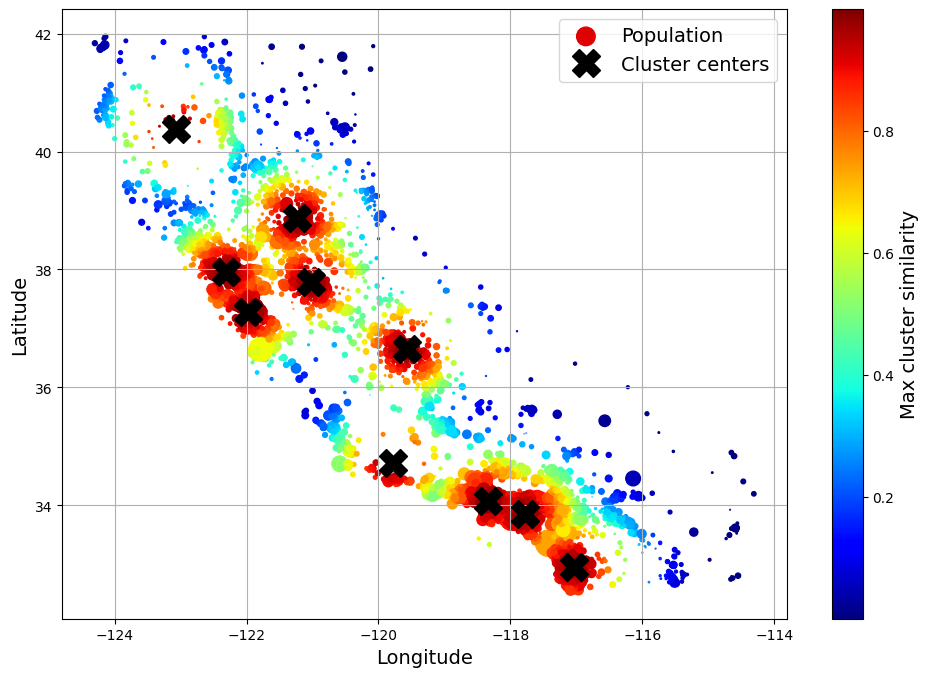

In [70]:
# Plot the clustered output

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1], # longitude
         cluster_simil.kmeans_.cluster_centers_[:, 0], # latitude
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

In [71]:
housing_renamed

,Longitude,Latitude,housing_median_age,total_rooms,total_bedrooms,Population,households,median_income,ocean_proximity,district,Max cluster similarity
877,-117.23,32.73,44.0,1168.0,263.0,509.0,256.0,2.7273,NEAR OCEAN,San Diego County,0.914873
17926,-118.48,34.04,36.0,2539.0,535.0,979.0,500.0,3.6667,<1H OCEAN,Los Angeles County,0.979562
16622,-122.04,37.97,26.0,2470.0,626.0,1174.0,573.0,2.9861,NEAR BAY,Contra Costa County,0.926659
3600,-117.20,32.79,29.0,1213.0,NaN,654.0,246.0,4.5987,NEAR OCEAN,San Diego County,0.946721
2367,-118.29,33.94,47.0,1782.0,338.0,1003.0,329.0,2.5398,<1H OCEAN,Los Angeles County,0.983466
...,...,...,...,...,...,...,...,...,...,...,...
13051,-117.83,33.79,25.0,2070.0,513.0,1078.0,460.0,2.9312,<1H OCEAN,Orange County,0.993854
2020,-119.83,36.80,16.0,6101.0,1200.0,3407.0,1134.0,3.1250,INLAND,Fresno County,0.912973
18265,-122.41,37.66,34.0,1075.0,318.0,906.0,294.0,3.0052,NEAR OCEAN,San Mateo County,0.908215
17960,-121.37,38.66,17.0,4866.0,1056.0,2371.0,1030.0,2.4574,INLAND,Sacramento County,0.940011


## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [72]:
# # Pipeline class: we can provide name to each processing step. This is useful during cross validation phase.
# from sklearn.pipeline import Pipeline

# num_pipeline = Pipeline([
#     ("impute", SimpleImputer(strategy="median")),
#     ("standardize", StandardScaler()),
# ])


# # make_pipeline method: it does not support providing name to the processing step 
# from sklearn.pipeline import make_pipeline

# num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


In [73]:
# Enable rich diagrammatic output for pipelines.
from sklearn import set_config

set_config(display='diagram')


In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

# Build a pipeline that does all the data transformation
def column_ratio(X):
    if hasattr(X, "iloc"):
        # It's a DataFrame
        return X.iloc[:, [0]].values / X.iloc[:, [1]].values
    else:
        # It's a NumPy array
        return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

# keep remaining columns using default_num_pipeline
# preprocessing = ColumnTransformer([
#         ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
#         ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
#         ("people_per_house", ratio_pipeline(), ["population", "households"]),
#         ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
#                                "households", "median_income"]),
#         ("geo", cluster_simil, ["latitude", "longitude"]),
#         ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
#     ],
#     remainder=default_num_pipeline) 


# remove unnecessary columns, by default remanider = drop
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        # ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
        #                        "households", "median_income"]),
        ("log", log_pipeline, ["population", "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, ["ocean_proximity"]),
        ('house_median_age', default_num_pipeline, ["housing_median_age"]) 
        # ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ])

In [75]:
# input train data to the above pipeline of column transformer 
preprocessing.set_output(transform="pandas")
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16052, 22)

In [76]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'house_median_age__housing_median_age'], dtype=object)

# Select and Train a Model

## Training and Evaluating on the Training Set

#### Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x00000212C1169800>,
                                                                                       func=<function column_ratio at 0x00000212C13D58A0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedr...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity']),
                                                 ('house_median_age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('linearregression', LinearRegression())])

Let's try the full preprocessing pipeline on a few training instances:

In [78]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([217500., 295500., 217100., 263200., 203100.])

Compare against the actual values:

In [79]:
housing_labels.iloc[:5].values

array([269700., 500001., 160900., 255600., 105700.])

In [80]:
# computes the error ratios for predicted value and housing labels
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-19.4%, -40.9%, 34.9%, 3.0%, 92.1%


In [81]:
# calculate RMSE manually
def root_mean_squared_error(labels, predictions):
    import numpy as np
    errors = (labels - predictions) ** 2
    return np.sqrt(np.mean(errors))

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
print(lin_rmse)

## using scikit learn
# from sklearn.metrics import root_mean_squared_error
# lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
# print(lin_rmse)

67710.8446820188


#### DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x00000212C1169800>,
                                                                                       func=<function column_ratio at 0x00000212C13D58A0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedr...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity']),
                                                 ('house_median_age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [83]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

np.float64(0.0)

#### Why Linear Regression Doesn't Give 0 MSE:

- Linear regression tries to fit a straight line through the input data. But:
    - Real-world data (like housing prices) is non-linear and has complex interactions.
    - A linear model is too simple to capture that complexity.
    - So even though it’s trained on the same data, the best-fit line can’t perfectly match all points → non-zero error during prediction →  (Underfitting).

#### Decision Tree regressor gives 0 MSE:
-   A DecisionTreeRegressor is a non-linear model that can perfectly memorize the training data — unless constrained by parameters like max_depth or min_samples_leaf
-   it exactly memorizes the training data (Overfitting)

We are currently using same training data for prediction which is just for trails and understand why cross validation is required. Later, we would use cross-validation with different models and understand the need of hyper-parameter tuning.

So, use part of the training set for training and part of it for model validation

## Better Evaluation Using Cross-Validation

In [84]:
# Each fold uses (1 / cv) of the data as validation, and the rest as training.
# Note: We already divided train and test data. We are currently using train data and splitting it into two parts: 
# train (sub_train) and validation based on cv value
# for cv= 10, we have 10 folds. validation data = 1/10 = 0.1 (10%) hence 90% is train (subtrain) data for each fold. This logic is implemented for all the folds.
# All this splits are handled internally by cross_val_score method 

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([69383.09523233, 64173.85567126, 65706.448244  , 66202.80125013,
       65466.48553847, 66627.87090321, 69373.89127542, 62901.3183576 ,
       63133.51800735, 63292.37723046])

In [85]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     65626.166171
std       2373.972059
min      62901.318358
25%      63512.746841
50%      65586.466891
75%      66521.603490
max      69383.095232
dtype: float64

In [86]:
#computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count        10.000000
mean      78058.106611
std       33362.763417
min       64735.496160
25%       66205.008326
50%       67746.256805
75%       69508.823566
max      172859.861235
dtype: float64

Check another model: Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [88]:
pd.Series(forest_rmses).describe()

# it is better than lin_reg and Random Forest but not that good as well.

count       10.000000
mean     46418.217868
std       1809.170701
min      44015.608908
25%      44890.979782
50%      46612.587107
75%      47298.470736
max      50022.813444
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [89]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

np.float64(17244.847139391644)

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Fine-Tune Your Model

## Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_name at 0x00000212C1169800>,
                                                                                                              func=<function column_ratio at 0x00000212C13D58A0>)),
                                                                                         ('standardscaler',
                                                                                          Standard...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['housing_median_age'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [91]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__bedrooms', 'preprocessing__rooms_per_house', 'preprocessing__people_per_house', 'preprocessing__log', 'preprocessing__geo', 'preprocessing__cat', 'preprocessing__house_median_age', 'preprocessing__bedrooms__memory', 'preprocessing__bedrooms__steps', 'preprocessing__bedrooms__transform_input', 'preprocessing__bedrooms__verbose', 'preprocessing__bedrooms__simpleimputer', 'preprocessing__bedrooms__functiontransformer', 'preprocessing__bedrooms__standardscaler', 'preprocessing__bedrooms__simpleimputer__add_indicator', 'preprocessing__bedrooms__simpleimputer__copy', 'preprocessing__bedrooms__simpleimputer__fill_value'

The best hyperparameter combination found:

In [92]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [93]:
grid_search_model = grid_search.best_estimator_
grid_search_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x00000212C1169800>,
                                                                                       func=<function column_ratio at 0x00000212C13D58A0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity']),
                                                 ('house_median_age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age'])])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

Let's look at the score of each hyperparameter combination tested during the grid search:

In [94]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43043,44057,42246,43115
6,10,4,43477,44487,42712,43559
13,15,8,43378,44365,43029,43591
3,8,4,43745,45046,43380,44057
14,15,10,44086,44867,43236,44063


## Randomized Search

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=<function ratio_name at 0x00000212C1169800>,
                                                                                                                    func=<function column_ratio at 0x00000212C13D58A0>)),
                                                                                               ('standardscaler',
                                                                                                St...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000212C13AE990>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000212C1303710>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [96]:
# display the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41986,42900,41027,41971
8,32,7,42046,42828,41344,42073
5,42,4,42750,43575,41436,42587
2,23,8,42658,43646,41822,42709
0,41,16,42549,43712,42028,42763


Analyze the Best Models and Their Errors

In [97]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.09, 0.06, 0.04, 0.01, 0.01, 0.18, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.02, 0.  , 0.02, 0.01,
       0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.08, 0.  , 0.  ,
       0.  , 0.01])

In [98]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.17825588425575328), 'log__median_income'),
 (np.float64(0.09259415237783837), 'bedrooms__ratio'),
 (np.float64(0.07757123759432183), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06154151032422503), 'rooms_per_house__ratio'),
 (np.float64(0.03981023530611303), 'people_per_house__ratio'),
 (np.float64(0.03501737433405381), 'geo__Cluster 39 similarity'),
 (np.float64(0.02430569560381779), 'geo__Cluster 29 similarity'),
 (np.float64(0.022714937600589923), 'geo__Cluster 34 similarity'),
 (np.float64(0.022398050633694138), 'geo__Cluster 41 similarity'),
 (np.float64(0.019057514206826318), 'geo__Cluster 36 similarity'),
 (np.float64(0.018630363711759176), 'geo__Cluster 32 similarity'),
 (np.float64(0.016949376665085256), 'geo__Cluster 3 similarity'),
 (np.float64(0.014756068442106508), 'geo__Cluster 15 similarity'),
 (np.float64(0.014608744808034903), 'geo__Cluster 14 similarity'),
 (np.float64(0.014537429777243361), 'geo__Cluster 16 similarity'),
 (np.float64(0.0142149200713

## Evaluate Your System on the Test Set

In [99]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
y_test.tail()

10166    300000.0
5377     190500.0
4691     500001.0
6066      58800.0
12001    147100.0
Name: median_house_value, dtype: float64

In [100]:

final_predictions = final_model.predict(X_test)
final_predictions[-5:]

array([210989.  , 212047.  , 444263.51,  81249.01, 148508.  ])

In [101]:

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

# validation_rmse was 42107 . So the obtained test rmse is better. If in case it was opposite then we might have performed lot of hyperparameter tuning.

38874.353871506275


##### We can compute a 95% confidence interval for the test RMSE:

In [102]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval


In [103]:
rmse_lower, rmse_upper

(np.float64(37147.319408006806), np.float64(40825.9276539866))

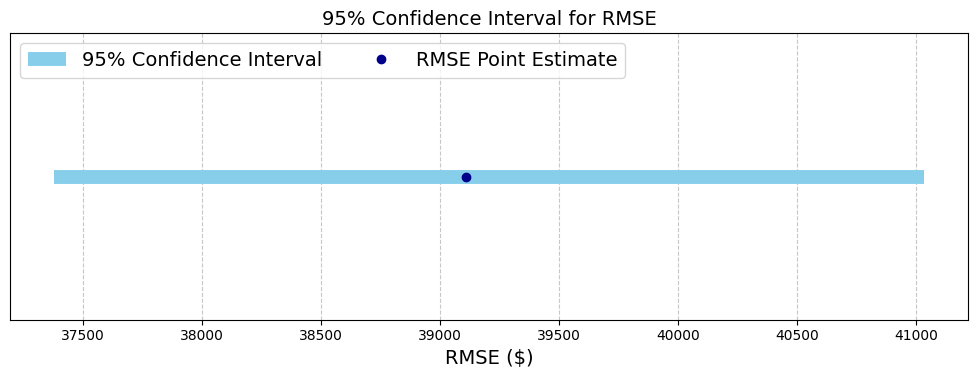

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Given confidence interval bounds
rmse_point = 39109
rmse_lower = 37376
rmse_upper = 41036

# Create the plot
plt.figure(figsize=(10, 4))
plt.hlines(1, rmse_lower, rmse_upper, color='skyblue', linewidth=10, label='95% Confidence Interval')
plt.plot(rmse_point, 1, 'o', color='darkblue', label='RMSE Point Estimate')

# Decorations
plt.yticks([])
plt.xlabel("RMSE ($)")
plt.title("95% Confidence Interval for RMSE")
plt.legend(loc='upper left', ncol=2)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Summary of the model

-   Our predictive model for estimating district-level median house values in California achieved a Root Mean Squared Error (RMSE) of approximately $39109. This means that on average, the model's predicted median house value differs from the actual value by around $39109.

-   Given that the house prices in our dataset range up to $500,000 (with values capped after this upper limit), this represents an average error of about 8–10%, which is considered acceptable in real estate pricing models based on demographic and geographic features.

- Further improvement could come from using more granular features, incorporating recent housing market trends, or removing the $500,000 value cap if possible. Removing uninformative attributes.


-   Our model's average prediction error (RMSE) is approximately $39109, and we are 95% confident that the true error lies between $37376 and $41036. This means that even accounting for statistical variation, the model remains reliably accurate within a ~±$2,000 range around the reported RMSE. This adds confidence in the model’s generalization ability and robustness.

### Opportunities for Improvement:

1) Remove Data Cap Bias:
-   The current dataset limits median house values to $500,000, hiding information about high-value districts. A dataset without this cap would allow the model to learn high-end pricing patterns better.

2) Add More Features:
-   Incorporating additional variables can significantly improve model accuracy such as:

    -   Recent market trends or sale prices

    -   School quality

    -   Proximity to key infrastructure (e.g., highways, downtown)

    -   Crime rates or job growth


3) Try Advanced Models:
-   While this chapter used simpler models (e.g., Linear Regression, Random Forest), experimenting with the following models can further reduce prediction error:

    -   Gradient Boosted Trees (e.g., XGBoost, LightGBM)
    -   Deep Learning models


# Model persistence using joblib

Save the final model:

In [105]:
import joblib

joblib.dump(final_model, "../model_assets/housing_model.pkl")

['../model_assets/housing_model.pkl']

The three most common file formats used for saving machine learning models:

| **Format**    | **Framework**       | **File Extension** | **Primary Use**                                                | **Pros**                                                            | **Cons**                                                         |
| ------------- | ------------------- | ------------------ | -------------------------------------------------------------- | ------------------------------------------------------------------- | ---------------------------------------------------------------- |
| **`.pkl`**    | Python (General)    | `.pkl`             | General-purpose Python object serialization                    | Flexible, works with various Python libraries                       | Not optimized for deep learning, inefficient for large models    |
| **`.pt`**     | PyTorch             | `.pt`, `.pth`      | PyTorch model serialization (weights, architecture, etc.)      | Optimized for PyTorch, efficient for large models                   | Specific to PyTorch, not cross-framework compatible              |
| **`.h5`**     | Keras, TensorFlow   | `.h5`              | Keras/TensorFlow model serialization                           | Cross-platform, efficient for deep learning                         | Primarily for Keras/TensorFlow, not suited for PyTorch           |
| **`.pb`**     | TensorFlow          | `.pb`              | TensorFlow SavedModel format for production deployment         | Optimized for deployment, supports both graph and weights           | TensorFlow-specific, less portable between frameworks            |
| **`.onnx`**   | Multiple frameworks | `.onnx`            | Interoperability format for models (PyTorch, TensorFlow, etc.) | Cross-framework compatibility, supports both training and inference | Larger model size, not as widely supported as PyTorch/TensorFlow |
| **`.tflite`** | TensorFlow Lite     | `.tflite`          | Optimized for mobile/embedded devices (mobile, IoT, etc.)      | Optimized for small devices, fast inference                         | TensorFlow-specific, only for inference, not training            |
| **`.sav`**    | Scikit-learn        | `.sav`             | Scikit-learn model serialization (via `joblib` or `pickle`)    | Efficient for scikit-learn models, supports large objects           | Not cross-framework compatible                                   |
